In [ ]:
# %%writefile img_functions.py 

# def sum(a,b):
#   return a+b

In [ ]:
# from  img_functions import sum
# print(sum(2,3))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io      


import transforms

**Histogram function**

In [ ]:

# def histogram(original_img):
    
#     img_size = original_img.shape 
#     height = img_size[0] 
#     width = img_size[1]  

#     count_pixels = np.zeros((256),dtype=np.uint8)

#     for i in range(height) :     
#         for j in range(width) :      
#             k = original_img[i][j]       
#             count_pixels[k] += 1 
            
#     cv2_imshow(original_img)
#     cv.waitKey(0)
#     cv.destroyAllWindows()
    
#     return count_pixels




In [9]:
def histogram (original_img):
  img_size = original_img.shape 
  height = img_size[0] 
  width = img_size[1]  

  count_pixels = np.zeros((256),dtype=np.uint8)

  for i in range(256):
    k = np.where(original_img == i)
    count_pixels[i] =len(original_img[k])

  cv2_imshow(original_img)
  cv.waitKey(0)
  cv.destroyAllWindows()
  
  return count_pixels

**Equalization Histogram Function**

In [5]:
def equalization_histo(img, im):

  cdf= np.zeros(256)
  
  # cdf
  cdf[0]= im[0]
  for i in range(256):
    cdf[i]= cdf[i-1] + im[i]
    

  b, a = cdf.max(), cdf.min() # ‫گرفتن min و max هیستوگرام تجمعی برای نرمال سازی
  cdf = (cdf - cdf.min()) * 255 #‫ با این کار cdf از صفر شروع خواهد شد و می‌توانیم به سراغ نرمال کردن آن برویم 
  normalized_cdf = np.array((cdf / (b - a)), dtype=np.uint8) # ‫نرمال کردن هیستوگرام تجمعی

  height = img.shape[0]
  width = img.shape[1]

  for h in range(height):
    for w in range(width):
      intensity = img[h][w]
      newintens= normalized_cdf[intensity] # ‫گرفتن مقدار جدید با توجه به هیستوگرام نرمال شده
      img[h][w] = newintens

  return img



In [6]:
image1 = cv.imread("download.jfif")
image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
image1= cv.resize(image1, (250, 250)) 


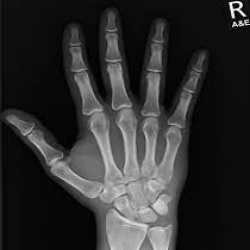

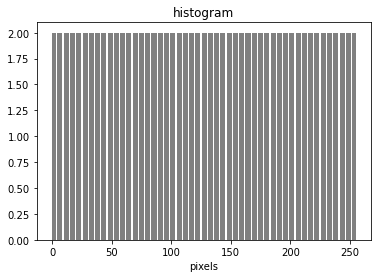

In [8]:
x= np.arange(0, 256)
img_histo= histogram(image1)
plt.bar(x, img_histo, color="gray",align="center" )
plt.xlabel('pixels')
plt.title("histogram");



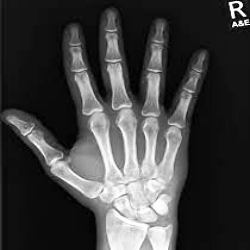

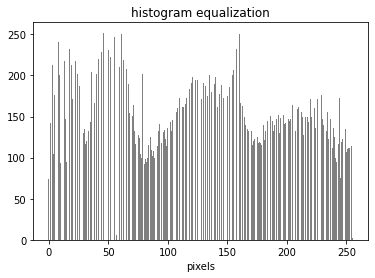

In [ ]:
img_equalized = equalization_histo(image1, img_histo)
new_hist = histogram(img_equalized)
x= np.arange(0, 256)
plt.bar(x, new_hist, color="gray",align="center" )
plt.xlabel('pixels')
plt.title('histogram equalization')

plt.show()

همانطور که در هیستوگرام این تصویر قابل مشاهده است تعداد پیکسلهای روشن کم و پیکسلهای تیره زیاد است با متعادلسازی هیستوگرام تعداد پیکسلهای روشن هم افزایش می‌یابند 
اما تصویر حاصل دارای بهبود غیرطبیعی می‌باشد لبه‌ها نسبت به تصویر اول بیشتر نمایان است 

**Negative Image**

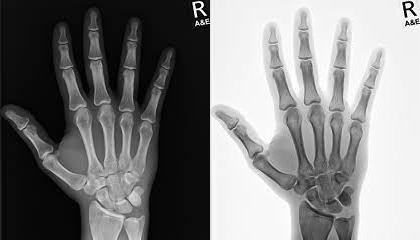

In [ ]:
negative_img=transforms.negative_image("download.jfif")


**Histogram of negative image**

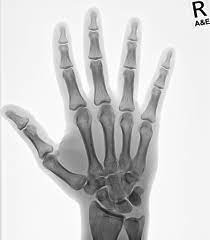

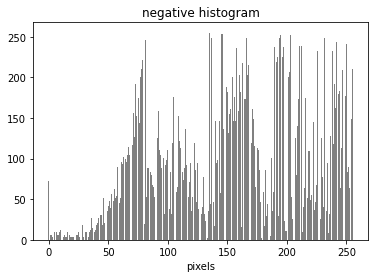

In [ ]:
neg_img_hist= histogram(negative_img)
plt.bar(x, neg_img_hist, color="gray",align="center" )
plt.xlabel('pixels')
plt.title("negative histogram")
plt.show()

نقاط تیره به روشن و روشن به تیره تبدیل شد 

**Histogram Equalization of Negative Image**

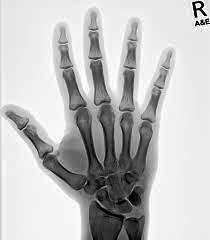

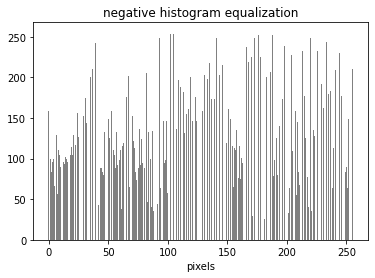

In [ ]:
neg_img_equalized= equalization_histo(negative_img, neg_img_hist)
new_neg_hist= histogram(neg_img_equalized)
x= np.arange(0, 256)
plt.bar(x, new_neg_hist, color='gray', align= 'center')
plt.xlabel('pixels')
plt.title('negative histogram equalization');


در هیستوگرام تصویر تعداد پیکسلهای تیره کم است که با متعادل‌سازی آن تعداد پیکسلهای تیره نیز افزایش یاقته و تصویر دست تیره‌تر می‌شوند

**Log Transform** 

/content/drive/MyDrive/image_notebooks/transforms.py:35: RuntimeWarning: divide by zero encountered in log
  log_image = c *(np.log(img + 1))


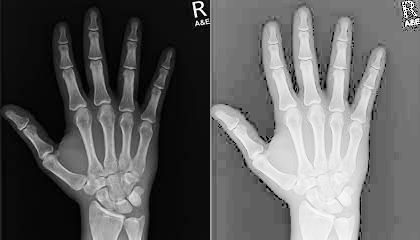

In [ ]:
log_img= transforms.log_func("download.jfif");

**Histogram of log transform**

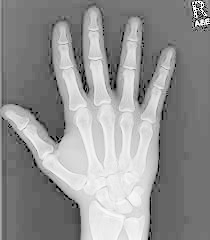

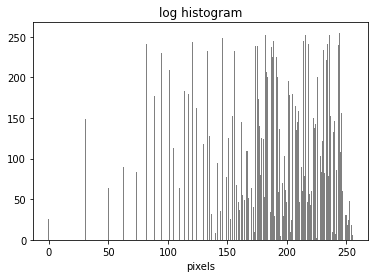

In [ ]:
log_img_hist= histogram(log_img)
x= np.arange(0, 256)
plt.bar(x, log_img_hist, color= 'gray', align='center')
plt.xlabel('pixels')
plt.title('log histogram');

**Equalization Histogram of log image**

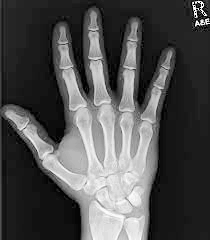

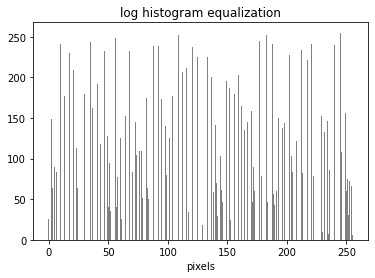

In [ ]:
log_img_equalized= equalization_histo(log_img, log_img_hist)
new_log_hist= histogram(log_img_equalized)
x= np.arange(0, 256)
plt.bar(x, new_log_hist, color='gray', align= 'center')
plt.xlabel('pixels')
plt.title('log histogram equalization');

با متعادل‌سازی هیستوگرام بک‌گراند تصویر تیره‌تر شده و مفاصل دست با وضوح بیشتری نمایش داده می‌شوند ولی مرزها که در تبدیل لگاریتمی نمایان بودند را از دست دادیم 

**Gamma Transform**

the number of gamma is:  0.1


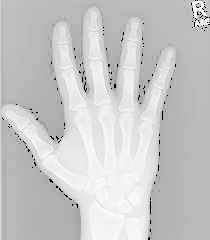

the number of gamma is:  0.5


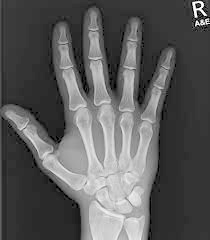

the number of gamma is:  1


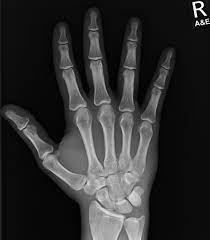

the number of gamma is:  1.5


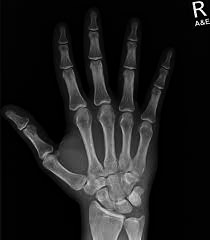

the number of gamma is:  2


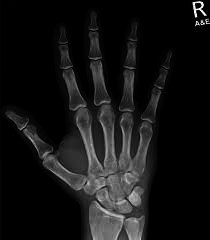

the number of gamma is:  2.5


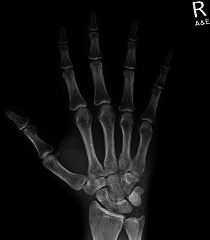

In [ ]:
gamma_image = transforms.gamma_img_func("download.jfif")

**Histogram of Gamma Transform**

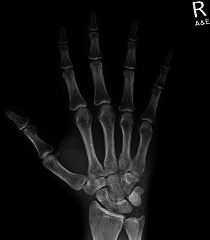

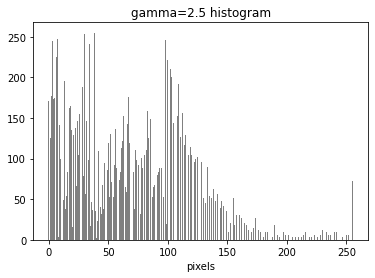

In [ ]:
gamma_img_hist= histogram(gamma_image)
x= np.arange(0, 256)
plt.bar(x, gamma_img_hist, color= 'gray', align='center')
plt.xlabel('pixels')
plt.title('gamma=2.5 histogram');

**Histogram Equalization of Gamma Transform**

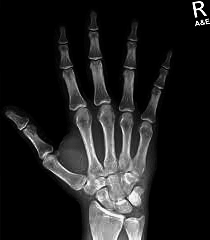

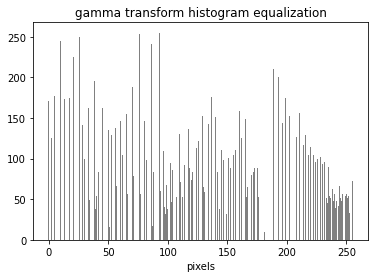

In [ ]:
gamma_img_equalized= equalization_histo(gamma_image, gamma_img_hist)
new_gamma_hist= histogram(gamma_img_equalized)
x= np.arange(0, 256)
plt.bar(x, new_gamma_hist, color='gray', align= 'center')
plt.xlabel('pixels')
plt.title('gamma transform histogram equalization');

،با اعمال تبدیل گاما به تصویر اصلی، کنتراست تصویر پایین آمده و در هیستوگرام آن نقاط روشن کمترمیشوند.
با متعادل‌سازی هیستوگرام وضوح تصویر بالاتر رفته و نقاط روشن هم دیده می‌شوند

**piecewise transform**

In [ ]:
piecewise_img= transforms.piecewise_func(image1, 70, 0, 140, 200)


In [ ]:
image1 = cv.imread("download.jfif")
image1 = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
image1= cv.resize(image1, (250, 250)) 


**Histogram of Piecewise Transform**

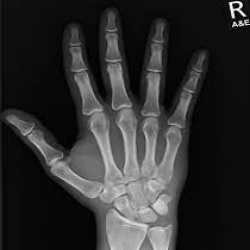

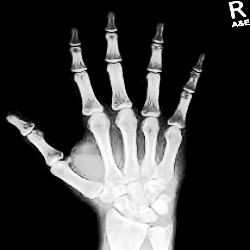

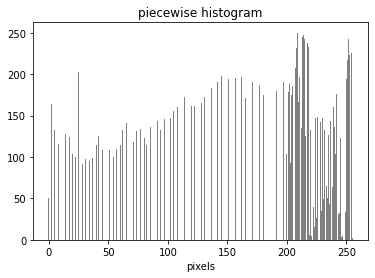

In [ ]:
cv2_imshow(image1)
print()

piecewise_img_hist= histogram(piecewise_img)
x= np.arange(0, 256)
plt.bar(x, piecewise_img_hist, color= 'gray', align='center')
plt.xlabel('pixels')
plt.title('piecewise histogram');

**Histogram Equalization of Piecewise Transform**

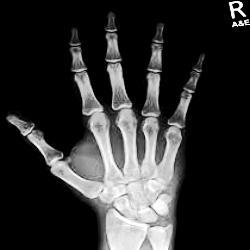

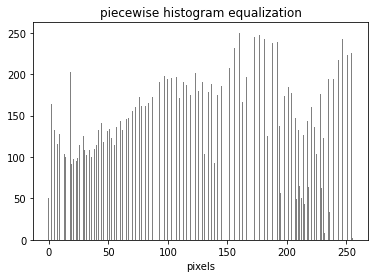

In [ ]:
piecewise_img_equalized= equalization_histo(piecewise_img, piecewise_img_hist)
new_piecwise_hist= histogram(piecewise_img_equalized)
x= np.arange(0, 256)
plt.bar(x, new_piecwise_hist, color='gray', align= 'center')
plt.xlabel('pixels')

plt.title('piecewise histogram equalization');

# Second Image

In [ ]:
image2 = cv.imread("images.jfif")
image2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
image2= cv.resize(image2, (250, 250)) 


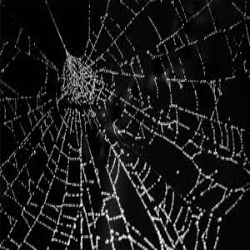

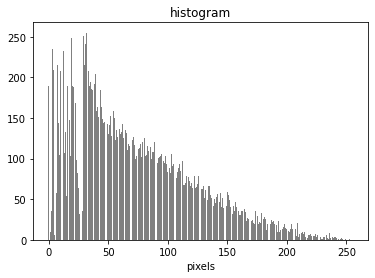

In [ ]:
image_hist2 = histogram(image2)
x= np.arange(0, 256)
plt.bar(x, image_hist2, color="gray",align="center" )
plt.xlabel('pixels')
plt.title('histogram')
plt.show()

**Histogram of negative image**

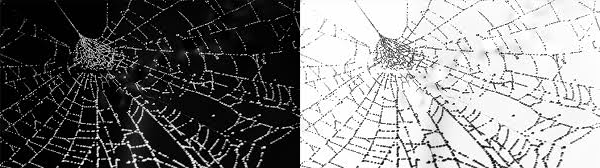

In [ ]:
negative_img1=transforms.negative_image("images.jfif")

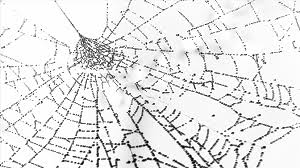

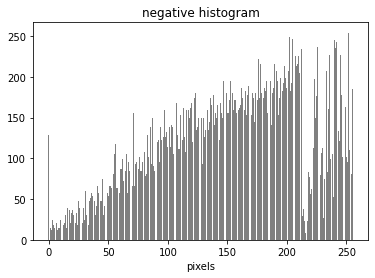

In [ ]:

neg_img_hist1= histogram(negative_img1)

plt.bar(x, neg_img_hist1, color="gray",align="center" )
plt.xlabel('pixels')
plt.title("negative histogram")
plt.show()

**Histogram Equalization of Negative Image**

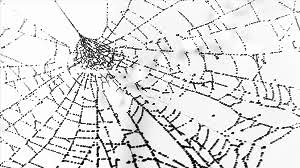

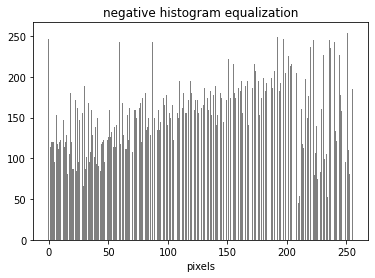

In [ ]:

neg_img_equalized1= equalization_histo(negative_img1, neg_img_hist1)
new_neg_hist1= histogram(neg_img_equalized1)
x= np.arange(0, 256)
plt.bar(x, new_neg_hist1, color='gray', align= 'center')
plt.xlabel('pixels')
plt.title('negative histogram equalization');


با اعمال هیستوگرام نرمال نقاطی از تصویر(تارهای عنکبوت) که واضح نبودند بهتر نمایش داده می‌شوند 

**Log Transform**

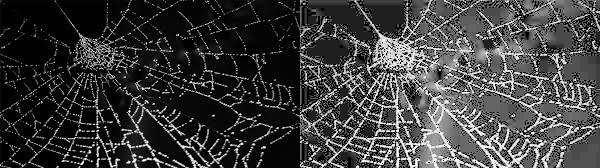

In [ ]:
log_img1= transforms.log_func("images.jfif");

**Histogram of Log Transform**

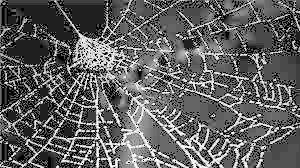

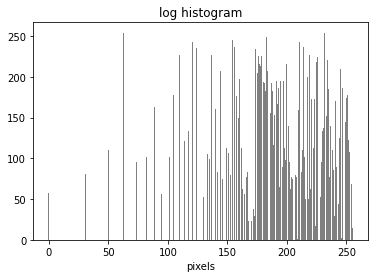

In [ ]:
log_img_hist1= histogram(log_img1)
x= np.arange(0, 256)
plt.bar(x, log_img_hist1, color= 'gray', align='center')
plt.xlabel('pixels')
plt.title('log histogram');

**Histogram Equalization of log Transform**



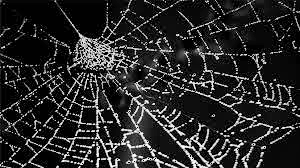

Text(0.5, 1.0, 'log histogram equalization')

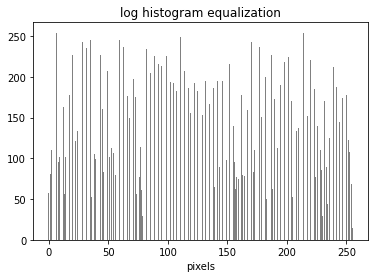

In [ ]:
log_img_equalized1= equalization_histo(log_img1, log_img_hist1)
new_log_hist1= histogram(log_img_equalized1)
x= np.arange(0, 256)
plt.bar(x, new_log_hist1, color='gray', align= 'center')
plt.xlabel('pixels')
plt.title('log histogram equalization')

**Gamma Transform**

the number of gamma is:  0.1


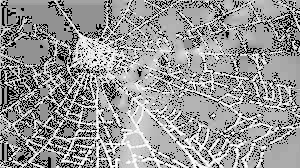

the number of gamma is:  0.5


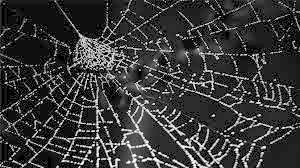

the number of gamma is:  1


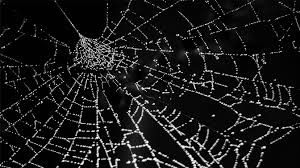

the number of gamma is:  1.5


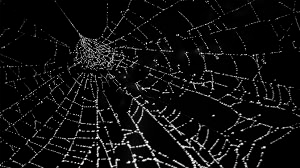

the number of gamma is:  2


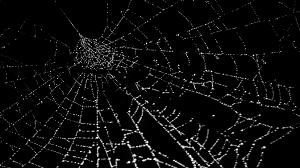

the number of gamma is:  2.5


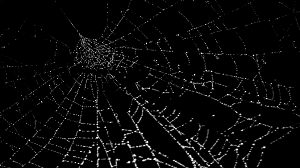

In [ ]:
gamma_image1 = transforms.gamma_img_func("images.jfif")

**Histogram of gamma Transform**
gamma = 2.5

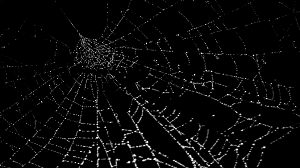

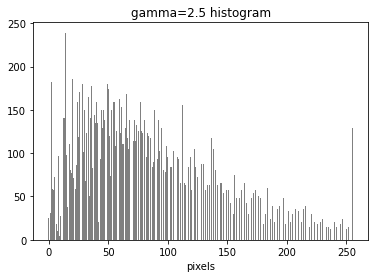

In [ ]:
gamma_img_hist1= histogram(gamma_image1)
x= np.arange(0, 256)
plt.bar(x, gamma_img_hist1, color= 'gray', align='center')
plt.xlabel('pixels')
plt.title('gamma=2.5 histogram');

**Histogram Equalization of Gamma Transform**

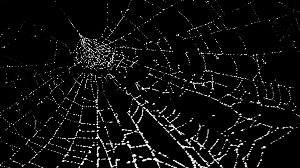

Text(0.5, 1.0, 'gamma histogram equalization')

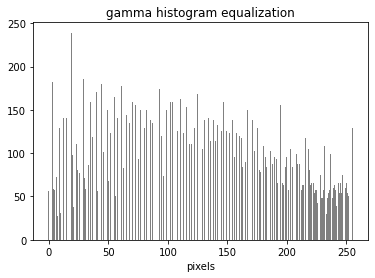

In [ ]:
gamma_img_equalized1= equalization_histo(gamma_image1, gamma_img_hist1)
new_gamma_hist1= histogram(gamma_img_equalized1)
x= np.arange(0, 256)
plt.bar(x, new_gamma_hist1, color='gray', align= 'center')
plt.xlabel('pixels')
plt.title('gamma histogram equalization')

در هیستوگرام تصویر حاصل از اعمال تبدیل گاما توزیع مقادیر روشنایی بیشتر در نقاط سفید و تا حدودی سیاه است ولی شدت روشنایی بقیه نقاط کم است پس از متعادل‌سازی هیستوگرام توزیع روشنایی در این نقاط هم افزایش یافته و شدت روشنایی نقاط سفید کاهش می‌یابد به گونه‌ای که وضوح تصویر در برخی نقاط را از دست داده‌ایم 

**Piecewise Transform**

In [ ]:
r1= 70
s1= 0
r2 = 150
s2= 200
piecewise_img1= transforms.piecewise_func(image2, r1, s1, r2, s2)

**Histogram of Piecewise Transform**

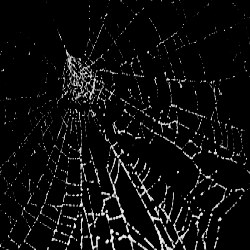

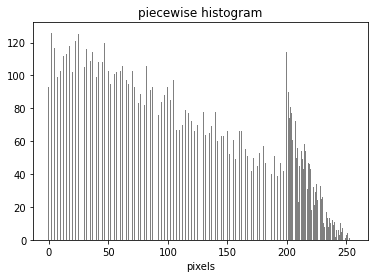

In [ ]:
piecewise_img_hist1= histogram(piecewise_img1)
x= np.arange(0, 256)
plt.bar(x, piecewise_img_hist1, color= 'gray', align='center')
plt.xlabel('pixels')
plt.title('piecewise histogram');

**Histogram Equalization of Piecewise Transform**

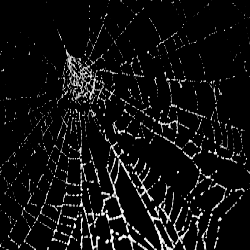

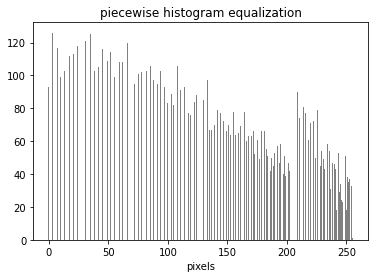

In [ ]:
piecewise_img_equalized1= equalization_histo(piecewise_img1, piecewise_img_hist1)
new_piecwise_hist1= histogram(piecewise_img_equalized1)
x= np.arange(0, 256)
plt.bar(x, new_piecwise_hist1, color='gray', align= 'center')
plt.xlabel('pixels')
plt.title('piecewise histogram equalization');

# Third Image

In [ ]:
image3 = cv.imread("coins.bmp", cv.IMREAD_GRAYSCALE)
image3= cv.resize(image3, (400, 250))

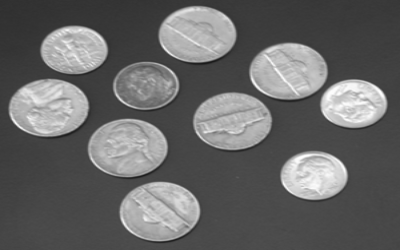

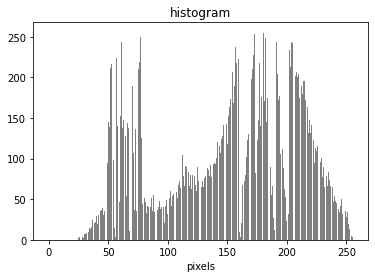

In [ ]:
hist_img2 = histogram(image3)
x= np.arange(0, 256)
plt.bar(x, hist_img2, color="gray",align="center" )
plt.xlabel('pixels')
plt.title('histogram')
plt.show()

**Histogram Equalization**

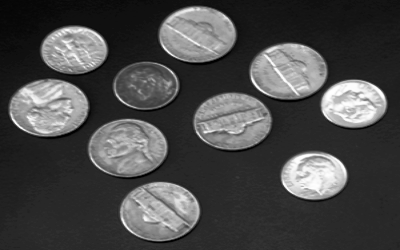

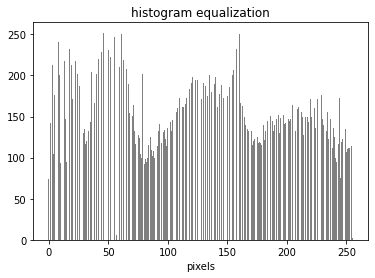

In [ ]:
img_equalized2 = equalization_histo(image3, hist_img2)
new_hist2 = histogram(img_equalized2)
x= np.arange(0, 256)
plt.bar(x, new_hist, color="gray",align="center" )
plt.xlabel('pixels')
plt.title('histogram equalization')

plt.show()

**Negative Transform**

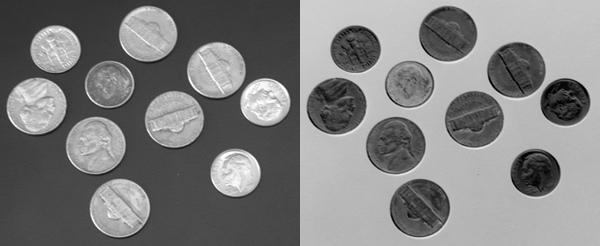

In [ ]:
negative_img2=transforms.negative_image("coins.bmp")

**Histogram of Negative Transform**

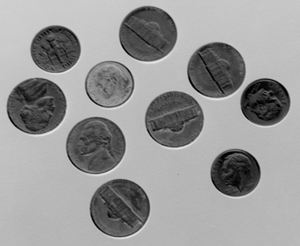

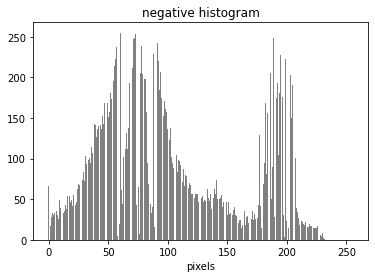

In [ ]:
neg_img_hist2= histogram(negative_img2)

plt.bar(x, neg_img_hist2, color="gray",align="center" )
plt.xlabel('pixels')
plt.title("negative histogram")
plt.show()

**Histogram Equalization of Negative Transform**

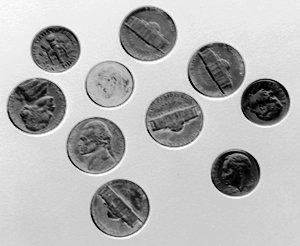

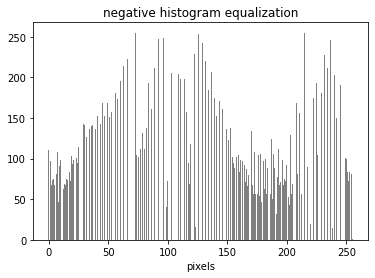

In [ ]:
neg_img_equalized2= equalization_histo(negative_img2, neg_img_hist2)
new_neg_hist2= histogram(neg_img_equalized2)
x= np.arange(0, 256)
plt.bar(x, new_neg_hist2, color='gray', align= 'center')
plt.xlabel('pixels')
plt.title('negative histogram equalization');


**Log Transform**

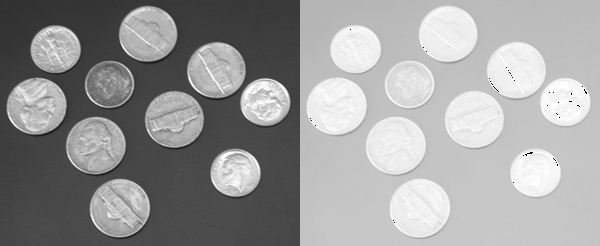

In [ ]:
log_img2= transforms.log_func("coins.bmp");

**Histogram of Log Transform**

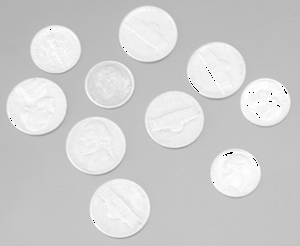

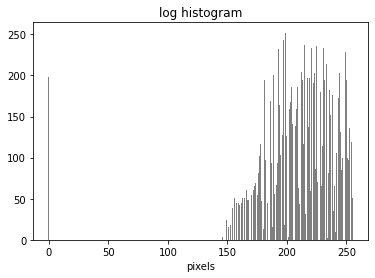

In [ ]:
log_img_hist2= histogram(log_img2)
x= np.arange(0, 256)
plt.bar(x, log_img_hist2, color= 'gray', align='center')
plt.xlabel('pixels')
plt.title('log histogram');

**Histogram Equalization of Log transform**

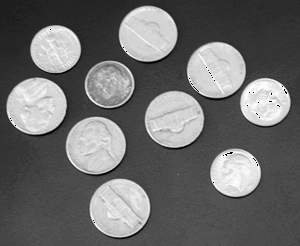

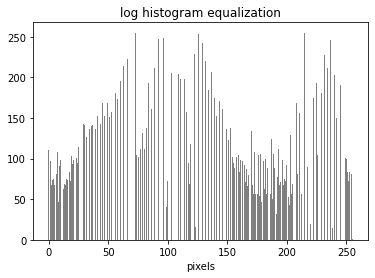

In [ ]:
log_img_equalized2= equalization_histo(log_img2, log_img_hist2)
new_log_hist2= histogram(log_img_equalized2)
x= np.arange(0, 256)
plt.bar(x, new_neg_hist2, color='gray', align= 'center')
plt.xlabel('pixels')
plt.title('log histogram equalization');

با اعمال تبدیل لگاریتم روی تصویر بیشتر پیکسلهای تیره از دست رفته و تمامی نقاط تصویر روشن هستند پس از متعادل‌سازی هیستوگرام آن تصویر تقریبا به حالت اولیه اولیه خود بازیابی شد  

**Gamma Transform**

the number of gamma is:  0.1


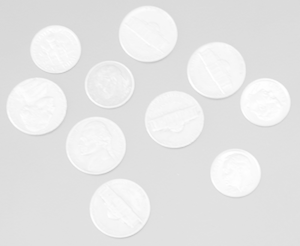

the number of gamma is:  0.5


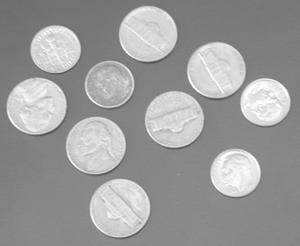

the number of gamma is:  1


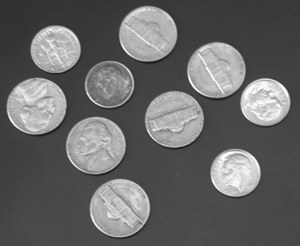

the number of gamma is:  1.5


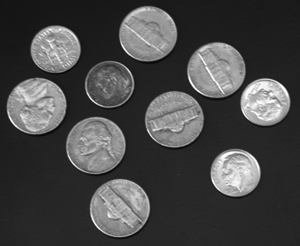

the number of gamma is:  2


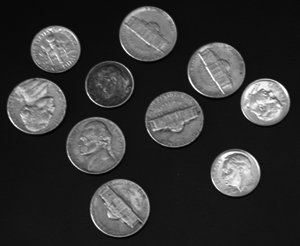

the number of gamma is:  2.5


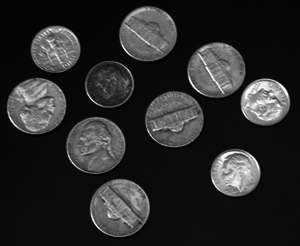

In [ ]:
gamma_image2 = transforms.gamma_img_func("coins.bmp")

**Histogram of Gamma Transform**

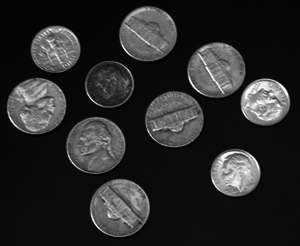

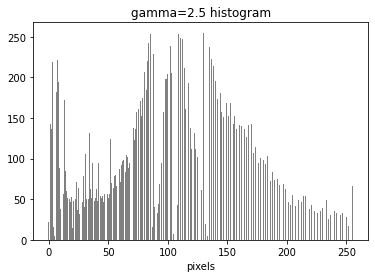

In [ ]:
gamma_img_hist2= histogram(gamma_image2)
x= np.arange(0, 256)
plt.bar(x, gamma_img_hist2, color= 'gray', align='center')
plt.xlabel('pixels')
plt.title('gamma=2.5 histogram');

**Histogram Equalization of Gamma Transform**

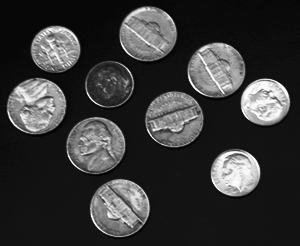

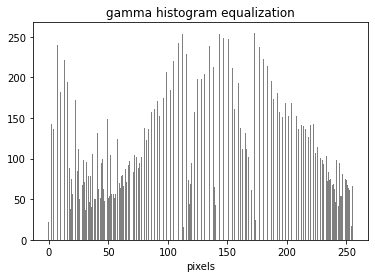

In [ ]:
gamma_img_equalized2= equalization_histo(gamma_image2, gamma_img_hist2)
new_gamma_hist2= histogram(gamma_img_equalized2)
x= np.arange(0, 256)
plt.bar(x, new_gamma_hist2, color='gray', align= 'center')
plt.xlabel('pixels')
plt.title('gamma histogram equalization');

**Piecewise Transform**

In [ ]:
piecewise_img2= transforms.piecewise_func(image3, 70, 0, 140, 200)

**Histogram of Piecewise Transform**

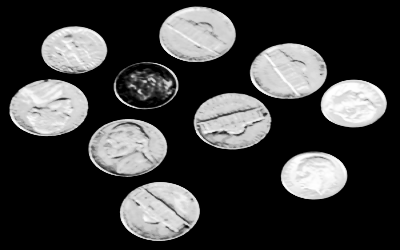

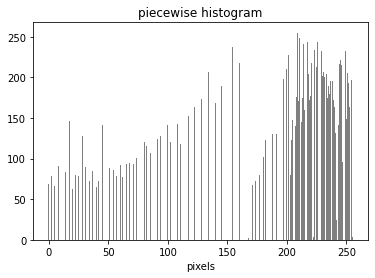

In [ ]:
piecewise_img_hist2= histogram(piecewise_img2)
x= np.arange(0, 256)
plt.bar(x, piecewise_img_hist2, color= 'gray', align='center')
plt.xlabel('pixels')
plt.title('piecewise histogram');

**Histogram Equalization of Piecewise Transformation**

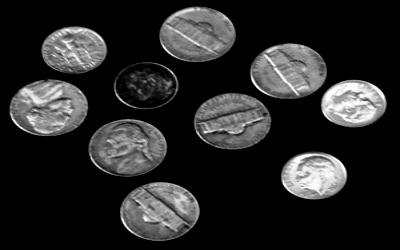

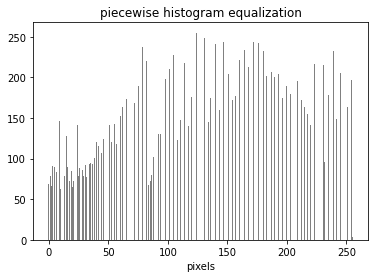

In [ ]:
piecewise_img_equalized2= equalization_histo(piecewise_img2, piecewise_img_hist2)
new_piecwise_hist2= histogram(piecewise_img_equalized2)
x= np.arange(0, 256)
plt.bar(x, new_piecwise_hist2, color='gray', align= 'center')
plt.xlabel('pixels')
plt.title('piecewise histogram equalization');

این تبدیل در تصویر باعث افزایش شدت در نقاط تیره و روشن تصویر شده پس از متعادل‌سازی هیستوگرام از شدت این نقاط کاهش یافته و نقاط خاکستری هم به تصویر اعمال می‌شوند 